In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA

In [18]:
class Mean_Shift:
    
    # Constructor 
    def __init__(self, radius=3): # Default Radius is 3 (You can tune it accordingly)
        #self.radius = 4
        self.radius = radius
        self.centroids = {}
        
    # Create Clusters   
    def fit(self, data):
        centroids = {}

        for i in range(len(data)):  #copying values
            centroids[i] = data[i]
        
        while True:   #make new clusters by checking their bandwith within radius
            upd_centroids = []
            for i in centroids:
                within_radius = []
                check_point = centroids[i]
                for j in data:
                    dist = LA.norm(j-check_point)
                    if dist == 0:
                        dist = 0.00000000001
                    if dist < self.radius:
                        within_radius.append(j)
                upd_centroids.append(tuple(np.average(within_radius,axis=0)))

            unique_centroids = sorted(list(set(upd_centroids)))
            prev_centroids = dict(centroids)
            centroids = {}
            
            i = 0
            while i < len(unique_centroids):
                centroids[i] = np.array(unique_centroids[i])
                i = i + 1
            
            flag = True                #this is for termination of the loop
            for i in centroids:
                if not flag:
                    break
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    flag = False
            if flag:
                break
        
        self.centroids = centroids

     

In [19]:
# Creating Data Set of clusters
X, _ = make_blobs(n_samples = 200, cluster_std =1.5)
print(X)

[[ 4.01993597 11.28369239]
 [10.45188008 10.34139563]
 [ 2.34513751  7.01088089]
 [ 0.74756943 -0.0647909 ]
 [ 0.12846507 -1.92496846]
 [ 3.64658355 -1.80557095]
 [ 3.12912655  8.75526481]
 [ 2.06032353  8.87600675]
 [ 6.93738634 11.81723557]
 [ 4.2037095   9.72918197]
 [ 2.14228765 -0.11862356]
 [ 1.43373424 10.71063047]
 [ 4.04466552 -1.34468707]
 [ 2.45730377  9.56044901]
 [ 5.42216251  9.919238  ]
 [ 4.16372932  8.38009891]
 [10.27391606 10.08868286]
 [ 9.65218027  9.50672107]
 [ 4.50835201 -3.11480739]
 [ 9.28645812  8.93878393]
 [ 8.78358793 10.16377419]
 [ 0.77472961 -0.99038897]
 [11.21232418  9.84678565]
 [ 0.31857886 -0.35784465]
 [-0.17849784 -1.6681057 ]
 [ 3.37377419 11.22182935]
 [ 5.33979741  9.49865646]
 [ 0.88509098 -3.17560069]
 [ 3.8617778   8.30625557]
 [ 2.46003587  9.48173636]
 [ 3.86513434 11.07216653]
 [ 5.32358985  8.24200234]
 [ 8.83130215  8.59931258]
 [ 9.26323275 11.01176037]
 [ 9.39030913  9.8897412 ]
 [ 9.15906308  8.72158378]
 [ 2.4909375   8.85810681]
 

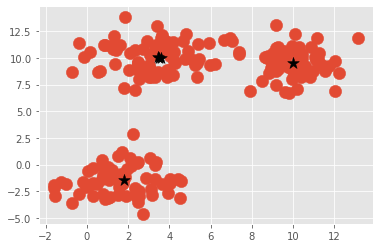

In [20]:
# Creating Object of Class
clf = Mean_Shift()
clf.fit(X)

# Getting Optimized Centroids

centroids = clf.centroids

# Simple Scatter plot of 2D Data X
plt.scatter(X[:,0], X[:,1],s=150)

# Plot Cluster centroids as '*'
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()